In [1]:
import sys
sys.path.append("../simcmb/")
sys.path.append("../simcmb/settings/")

In [2]:
import camb_ps_maker as cpm
import yam_io as yi
import clplotting

from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
Yd0 = yi.Ydict("../simcmb/settings/planck_2018_1e4.yaml")
PM0 = cpm.PS_Maker(Yd0)

In [4]:
cl0 = PM0.get_cls(PM0.Ydict.pars)

from 13:36:04.023148 P to 13:36:05.617339 P or 1.594191 seconds total


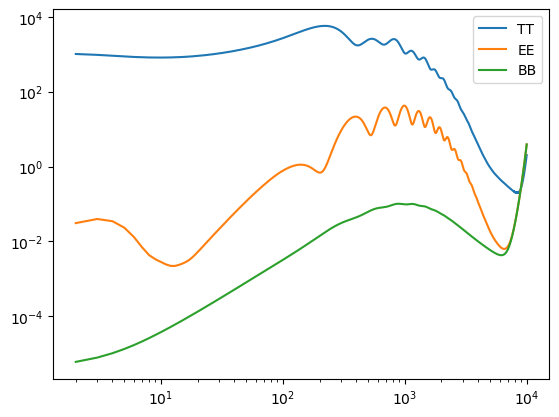

In [5]:
plt.plot(cl0['l'][2:], cl0['clTT'][2:], label='TT')
plt.plot(cl0['l'][2:], cl0['clEE'][2:], label='EE')
plt.plot(cl0['l'][2:], cl0['clBB'][2:], label='BB')
plt.loglog()
plt.legend()
plt.show()

In [6]:
PM0.update_vals('noise_level', 8, incamb=False)

In [7]:
cl1 = PM0.get_cls(PM0.Ydict.pars)

from 13:36:05.948330 P to 13:36:07.432288 P or 1.483958 seconds total


In [8]:
PM0.update_vals('beam_fwhm', 6, incamb=False)

In [9]:
cl2 = PM0.get_cls(PM0.Ydict.pars)

from 13:36:07.439373 P to 13:36:08.797920 P or 1.358547 seconds total


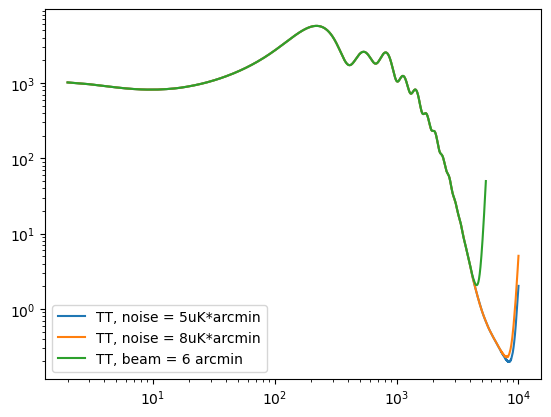

In [10]:
plt.plot(cl0['l'][2:], cl0['clTT'][2:], label='TT, noise = 5uK*arcmin')
plt.plot(cl1['l'][2:], cl1['clTT'][2:], label='TT, noise = 8uK*arcmin')
plt.plot(cl2['l'][2:], cl2['clTT'][2:], label='TT, beam = 6 arcmin')
plt.loglog()
plt.legend()
plt.show()

In [11]:
f1 = clplotting.flatmap(192, 5, cl_dict=cl0)

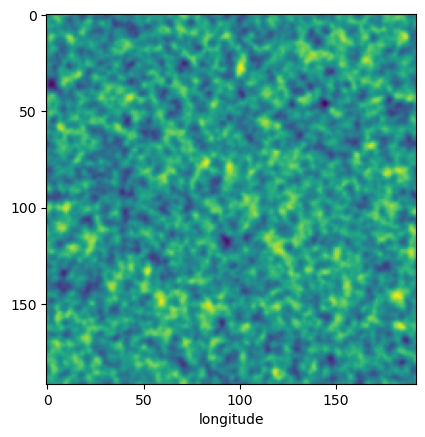

In [12]:
plt.imshow(f1.flatmap('T', seed = 0)[0])
plt.xlabel("longitude")
plt.xticks(range(0,200,50))
plt.yticks(range(0,200,50))
plt.show()

In [13]:
np.sum(f1.flatmap('T', seed = 0)[0] - f1.flatmap('T', seed = 0)[0]),\
np.sum(f1.flatmap('T', seed = 1)[0] - f1.flatmap('T', seed = 0)[0])

(728.1322687715292, -1602.4520239159465)

In [14]:
f1.flatmap('TEB').shape

(3, 192, 192)

In [15]:
f1.flatmap('TQU').shape

(3, 192, 192)

In [16]:
f2 = clplotting.flatmap(192, 5)
f2.flatmap('what')

if you don't want to restrict to a `cl_dict` dictionary, use `self._flatmap` instead


In [17]:
f1.flatmap('E'), f1.flatmap('EE'), f1.flatmap('clEE')

(array([[[ 2517.24753767,  1519.44765947,  1578.93525903, ...,
          -2637.33835876, -1094.31459069,   791.38222124],
         [ 1008.01891913,   715.74143875,  -221.55255544, ...,
           -771.44939563,    18.51325888,   962.63510166],
         [-1527.52817557, -2721.42410964, -2137.74862542, ...,
          -1550.36544015,  -915.11595644, -1203.80265456],
         ...,
         [ 1763.6268729 ,  2688.36875515,  2420.35748558, ...,
          -2436.92265616, -2688.80840306,  -888.28900693],
         [ 2901.6190531 ,  3954.86743571,  3395.4032444 , ...,
          -3577.59775898, -2731.68333315,  -593.71781806],
         [ 2397.27193579,  3366.36901391,  2069.8361281 , ...,
          -3599.69526921, -2837.78279422,   506.22921248]]]),
 array([[[-1838.85366127,  -807.76790929, -1417.35766801, ...,
          -2029.31436858, -3240.94271752, -1801.55333623],
         [ -137.86011253,   138.4253135 ,  2309.51909844, ...,
          -2594.67007557, -4420.64117457, -3370.23452644],
       

In [18]:
f1.flatmap('K')

not a valid map specification


In [19]:
PM0.update_vals('Alens', 1.05, incamb=True)

In [20]:
cl3 = PM0.get_cls(PM0.Ydict.pars)

from 13:36:09.316294 P to 13:36:10.618747 P or 1.302453 seconds total


In [21]:
PM0.update_vals('r', 0.05, incamb=True)

In [22]:
cl4 = PM0.get_cls(PM0.Ydict.pars)

from 13:36:29.333118 P to 13:36:30.613233 P or 1.280115 seconds total


In [23]:
yi.savecls([cl0, cl3, cl4], "/Users/sammcd/Desktop/test_save_cls")

TypeError: 'NoneType' object cannot be interpreted as an integer

In [43]:
PM0.Ydict.pars.Alens

1.05